# Week 5 Discussion

## Infographic

* [How the Circle Line rogue train was caught with data][train]

[train]: https://blog.data.gov.sg/how-we-caught-the-circle-line-rogue-train-with-data-79405c86ab6a

## Links

* [UC Irvine Machine Learning Repository][uci] -- many small datasets for testing ML methods
* [MLData][] -- more datasets for testing ML methods

[uci]: https://archive.ics.uci.edu/ml
[MLData]: http://mldata.org/

## Notes

### The Python Machine Learning Landscape

The leading Python package for statistics is [statsmodels][] and machine learning is [scikit-learn][].

There are many packages for neural networks. The [top three](https://github.com/thedataincubator/data-science-blogs) are:

1. [keras][]/sonnet/tensorflow, backed by Google
2. [caffe2][]/caffe, backed by Facebook
3. [pytorch][], backed by Facebook

[statsmodels]: http://www.statsmodels.org/
[scikit-learn]: http://scikit-learn.org/
[keras]: https://keras.io/
[caffe2]: https://caffe2.ai/
[pytorch]: http://pytorch.org/

### Machine Learning Models

In _supervised_ learning, we give the model some _training data_. Based on the training data, the model makes predictions about new observations. The variable we want to predict is called the _response_ variable.

* continous response $\implies$ _regression_ model
* discrete/categorical response $\implies$ _classification_ model

By doing some math, most supervised learning models apply to either kind of response variable. Examples:

* linear/logistic regression (yes, logistic regression is a classification model despite its name)
* regression/classification trees
* k-nearest neighbors
* support vector regression/machine
* neural networks

In _unsupervised_ learning, the model groups or _clusters_ the observations based on how similar they are. Examples:

* k-means clustering
* hierarchical clustering

### Example 1: Manual Classification

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import sklearn as sk
import sklearn.datasets

In [13]:
# The iris data set is included with seaborn.
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Can we predict species based on the other four variables?

For instance, if an observation has `sepal_length` $> c$ can we say what species it is?

How should we choose $c$ to work well for all observations?

And should we use `sepal_length`, or some other variable, or a combination of variables?

---

Based on the pair plot, `sepal_length` is not going to work well. Neither is `sepal_width`.

But `petal_length` and `petal_width` might.

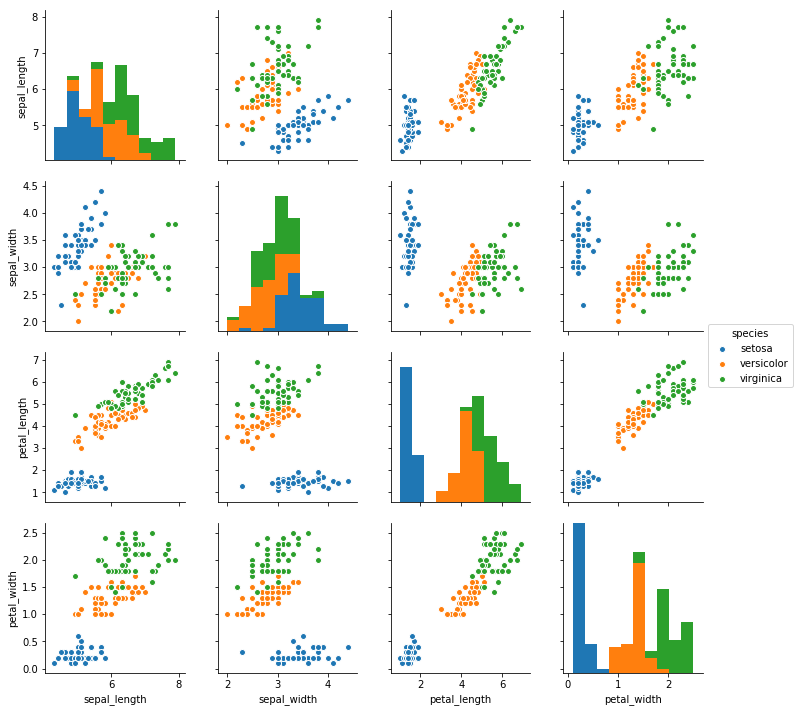

In [17]:
sns.pairplot(iris, hue = 'species')

Can we manually come up with a _classifier_ (a set of rules for choosing the species based on the four variables)?

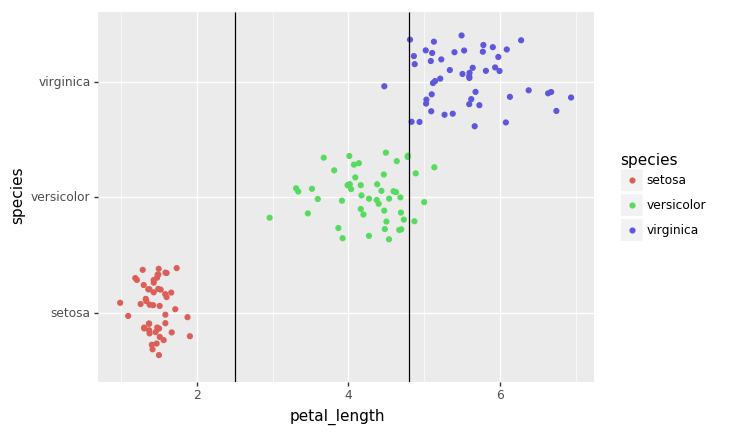

<ggplot: (8733677108558)>

In [31]:
g = ggplot(iris, aes('petal_length', 'species', color = 'species')) + geom_jitter()
g += geom_vline(xintercept = 2.5) # guess 2.5
g += geom_vline(xintercept = 4.8) # guess 4.8
g

How can we check how "good" our classifier is?

In [41]:
iris['prediction'] = 'setosa'
iris.loc[iris.petal_length > 2.5, 'prediction'] = 'versicolor'
iris.loc[iris.petal_length > 4.8, 'prediction'] = 'virginica'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [65]:
# Make a confusion matrix.
pd.crosstab(iris.species, iris.prediction)

prediction,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,46,4
virginica,0,3,47


### Example 2: Recall and Precision

If we ignore setosa, there are only two classes (a _binary_ classification problem).

In [115]:
iris2 = iris[iris.species != 'setosa'].copy()

In [89]:
cm = pd.crosstab(iris2.species, iris2.prediction)
cm

prediction,versicolor,virginica
species,,
versicolor,46,4
virginica,3,47


In this case, we can think of one class as "positive" and one class as "negative".

Let's say versicolor is "positive". Then our confusion matrix has counts for four possibilities:

True Positive | False Negative
:---|:----
__False Positive__ | __True Negative__

We can use this to compute three statistics:

\begin{align*}
\frac{ \textrm{TP} }{ \textrm{TP + FN} } &= \textrm{True Positive Rate or Recall} &\textit{higher is better}
\\
\frac{ \textrm{FP} }{ \textrm{FP + TN} } &= \textrm{False Positive Rate} &\textit{lower is better}
\\
\frac{ \textrm{TP} }{ \textrm{TP + FP} } &= \textrm{Precision} &\textit{higher is better}
\end{align*}

Recall and precision emphasize predicting the "positive" class correctly. They change as we change our classifier.

In [86]:
def recall(cm):
    return cm.iloc[0, 0] / (cm.iloc[0, 0] + cm.iloc[0, 1])

def precision(cm):
    return cm.iloc[0, 0] / (cm.iloc[0, 0] + cm.iloc[1, 0])

In [90]:
"Recall: {:.3f}, Precision: {:.3f}".format(recall(cm), precision(cm))

'Recall: 0.920, Precision: 0.939'

In [94]:
pd.crosstab(iris2.species, iris2.petal_length <= 4.8)

petal_length,False,True
species,,
versicolor,4,46
virginica,47,3


In [95]:
pr_curve = []
for x in np.linspace(4, 6, 6):
    predicted = np.where(iris2.petal_length < x, 'versicolor', 'virginica')
    cm = pd.crosstab(iris2.species, predicted)
    pr_curve.append((x, recall(cm), precision(cm)))
    
pr_curve = pd.DataFrame(pr_curve)
pr_curve.columns = ['petal_length', 'recall', 'precision']
pr_curve

,petal_length,recall,precision
0,4.0,0.22,1.000000
1,4.4,0.50,1.000000
2,4.8,0.88,0.977778
3,5.2,1.00,0.757576
4,5.6,1.00,0.666667
5,6.0,1.00,0.561798


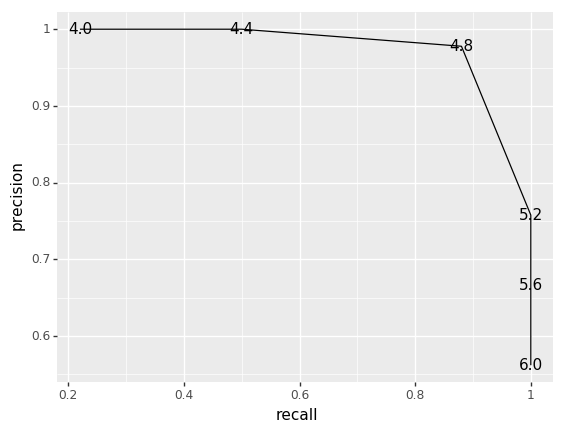

<ggplot: (8733676737947)>

In [97]:
ggplot(pr_curve, aes('recall', 'precision')) + geom_line() + geom_text(aes(label = 'petal_length'))

Do recall and precision make sense when there are more than two classes?

### Example 3: Logistic Regression

Linear regression fits a model
$$
y_i = \beta_0 + \beta_1 x_i
$$
where $y$ is a continuous variable.

We can't use species as $y$ in a linear regression since species is not continuous.

Instead let's assume there's some probability $p_i$ of the positive class (versicolor) for each observation. In other words, the data looks like:

In [ ]:
# Drop 'prediction' column.
iris2.drop(columns = 'predicition', inplace = True)

In [123]:
# Make up some fake values of p.
iris2['p'] = np.random.rand(iris2.shape[0])
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,p
50,7.0,3.2,4.7,1.4,versicolor,0.390220
51,6.4,3.2,4.5,1.5,versicolor,0.042375
52,6.9,3.1,4.9,1.5,versicolor,0.141776
53,5.5,2.3,4.0,1.3,versicolor,0.149856
54,6.5,2.8,4.6,1.5,versicolor,0.257866


Of course, these values of $p_i$ are made up. In reality, we can't see $p_i$. But $p_i$ is continuous, so we can predict it!

In that case the linear model is
$$
p_i = \beta_0 + \beta_1 x_i
$$

This is still a little bit silly. The probabilities $p_i$ must be in the interval $[0, 1]$, but $\beta_0 + \beta_1 x_i$ can be any number. So this model might occasionally predict a probability less than $0$ or greater than $1$.

We can fix this by transforming the response $p_i$ so that it can be any number. One way to do this is with the _logit function_ (this is not the only possibility). After the logit transformation, the model is:

$$
\log\bigg(\frac{p_i}{1 - p_i}\bigg) = \beta_0 + \beta_1 x_i
$$

Now the model makes sense.

#### How To Fit The Model

In a linear model we usually fit the model by _least squares_. That means we find $\beta_0$ and $\beta_1$ to minimize the squared error

$$
\sum_i \big\lvert y_i - (\beta_0 + \beta_1 x_i) \big\rvert^2
$$

In order to use least squares, we need to know $y_i$. So how we can fit the logistic model if we don't know $p_i$?

Rather than using least squares, we can fit a logistic model by _maximum likelihood_. The idea is that there is some "total" probability of the training data we have observed. <span style="background-color:#AFA">Assuming</span> the observations are independent, this probability is

$$
\prod_i p_i^{\ell_i} (1 - p_i)^{1 - \ell_i}
$$

where $\ell_i$ is the class label encoded as $0$ or $1$. In the iris example, virginica is $0$ and versicolor is $1$. We can solve our model for $p_i$ to get the substitution

$$
p_i = \frac{1}{1 + \exp\big(-(\beta_0 + \beta_1 x_i)\big)}
$$

Finally, it's reasonable to <span style="background-color:#AFA">assume</span> that the probability of the data we actually have is high (because otherwise we would likely have different data). So we find $\beta_0$ and $\beta_1$ to maximize that probability.

In [109]:
import sklearn.linear_model

lr = sk.linear_model.LogisticRegression()
fitted = lr.fit(iris2.petal_length.values.reshape(-1, 1), iris2.species)

In [110]:
print(fitted.coef_)
print(fitted.intercept_)

[[0.82179781]]
[-3.85717301]
